# Realizando as primeiras consultas

Bibliotecas utilizadas:

pandas==2.2.2

llama-index==0.11.20

llama-index-llms-groq==0.2.0

llama-index-experimental==0.4.0

gradio==5.4.0

fpdf==1.7.2

In [1]:
url = 'https://raw.githubusercontent.com/alura-cursos/llamaIndex_pandas_query/refs/heads/main/Dados/vendas.csv'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,ID_compra,filial,cidade,tipo_cliente,genero,tipo_produto,preco_unitario,quantidade,imposto_5%,total,data,hora,forma_pagamento,avaliacao
0,750-67-8428,A,Santo André,Membro,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Carteira Digital,9.1
1,226-31-3081,C,São Caetano,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Dinheiro,9.6
2,631-41-3108,A,Santo André,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Cartão de Crédito,7.4
3,123-19-1176,A,Santo André,Membro,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Carteira Digital,8.4
4,373-73-7910,A,Santo André,Normal,Masculino,Esportes e Viagem,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Carteira Digital,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        1000 non-null   object 
 1   filial           1000 non-null   object 
 2   cidade           1000 non-null   object 
 3   tipo_cliente     1000 non-null   object 
 4   genero           1000 non-null   object 
 5   tipo_produto     1000 non-null   object 
 6   preco_unitario   1000 non-null   float64
 7   quantidade       1000 non-null   int64  
 8   imposto_5%       1000 non-null   float64
 9   total            1000 non-null   float64
 10  data             1000 non-null   object 
 11  hora             1000 non-null   object 
 12  forma_pagamento  1000 non-null   object 
 13  avaliacao        1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [6]:
df.duplicated().sum()

0

# Definindo a LLM e configurando a Chave de API

In [7]:
# Aqui faremos a instalação do Llama, e utilizamos a função -q no final para ele resumir as notificações de instalação

!pip install llama-index llama-index-experimental -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24

In [8]:
# Aqui vamos usar uma ferramenta gratuita, disponível pela ferramenta Groq
# Essa chave fica armazenada dentro da aba de secrets do Colab

from google.colab import userdata
key = userdata.get('grop_api_key')

In [9]:
# Vamos instalar a biblioteca para usar o Groq

!pip install llama-index-llms-groq -q

In [10]:
# Definindo o modelo de linguagem, vamos usar o de 70 bilhões de parâmetros

from llama_index.core import Settings
from llama_index.llms.groq import Groq

Settings.llm = Groq(model='llama3-70b-8192', api_key=key)

In [11]:
# Vamos importar o query engine para poder trabalhar com as queries

from llama_index.experimental.query_engine import PandasQueryEngine

In [12]:
# Aqui vamos definir o nosso query engine

query_engine = PandasQueryEngine(df=df, verbose=True)

In [13]:
# Aqui vamos fazer a nossa primeira pergunta
# Como vamos observar na resposta, ele vai nos passar o código utilizado e a resposta em seguida

response = query_engine.query('Qual é a forma de pagamento mais utilizada pelos cliente?')

> Pandas Instructions:
```
df['forma_pagamento'].value_counts().index[0]
```
> Pandas Output: Carteira Digital


In [14]:
# Podemos copiar o código acima, para verificar se ele realmente funciona

df.forma_pagamento.value_counts().index[0]

'Carteira Digital'

In [15]:
# Agora uma pergunta um pouco mais complexa

response = query_engine.query('Qual o tipo de produto com maior quantidade por filial?')

> Pandas Instructions:
```
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()
```
> Pandas Output: filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [16]:
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()

,quantidade
filial,
A,"(A, Casa)"
B,"(B, Esportes e Viagem)"
C,"(C, Alimentos e Bebidas)"


In [17]:
# Se pegarmos agora a nossa variável, podemos avaliar o passo a passo de como ela foi criada

response

Response(response='filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object', source_nodes=[], metadata={'pandas_instruction_str': "df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()", 'raw_pandas_output': 'filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object'})

In [18]:
# Outro jeito de visualizar a resposta

print(response.response)

filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [19]:
response = query_engine.query('Qual é a forma de pagamento mais utilizada pelos clientes em cada filial?')

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object


In [20]:
# Agora vamos trabalhar para ter respostas mais detalhadas com o parâmetro synthesize_response

query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response=True)

In [21]:
# Agora temos um texto descritivo no final

response = query_engine.query('Qual a avaliação média de cada filial?')
print(str(response))

> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


In [22]:
# Vamos formatar melhor o texto das respostas

import textwrap

def formatar_texto(response):
  texto = response.response
  texto_formatado = textwrap.fill(texto, width=100)
  print(texto_formatado)

In [23]:
formatar_texto(response)

A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial
B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


In [24]:
# Gerando gráficos com o pandas query engine

response = query_engine.query('Me mostre a distribuição das avaliações')

> Pandas Instructions:
```
df['avaliacao'].value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64


In [25]:
formatar_texto(response)

A distribuição das avaliações é a seguinte: a avaliação mais comum é 6.0, que aparece 26 vezes,
seguida de 6.6, que aparece 24 vezes. Em seguida, temos 4.2 e 9.5, que aparecem 22 vezes cada. A
distribuição apresenta uma variedade de avaliações, com 61 valores únicos.


> Pandas Instructions:
```
df.avaliacao.plot(kind='hist')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


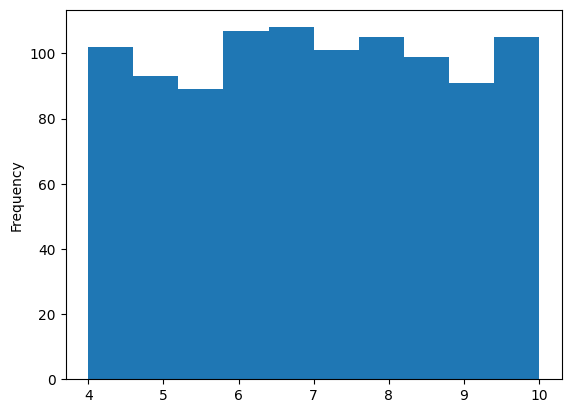

In [26]:
# Para gerar o gráfico, precisamos ser mais específicos

response = query_engine.query('Me mostre o gráfico distribuição das avaliações')

In [27]:
formatar_texto(response)

Here is a synthesized response:  "Here is the histogram distribution of the evaluations:  [Insert
histogram graph here]  This graph shows the frequency of each evaluation score, providing a visual
representation of the distribution of ratings.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


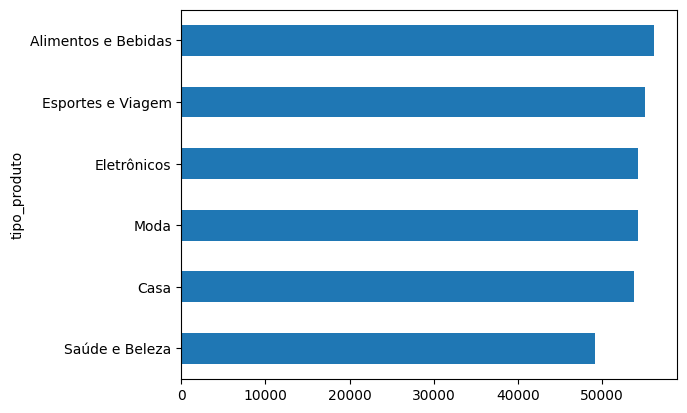

In [28]:
# Gerando um gráfico mais complexo

response = query_engine.query('Você pode plotar o valor total por tipo de produto, ordenado do menor para o maior e mantendo as barras na horizontal?')

In [29]:
formatar_texto(response)

Sim, é possível plotar o valor total por tipo de produto, ordenado do menor para o maior e mantendo
as barras na horizontal. Você pode usar o seguinte código Pandas:
`df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')`  Isso irá agrupar os
dados por tipo de produto, calcular a soma do valor total para cada grupo, ordenar os resultados do
menor para o maior e criar um gráfico de barras horizontal. O resultado será um gráfico que mostra o
valor total por tipo de produto, com as barras na horizontal e ordenadas do menor para o maior.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


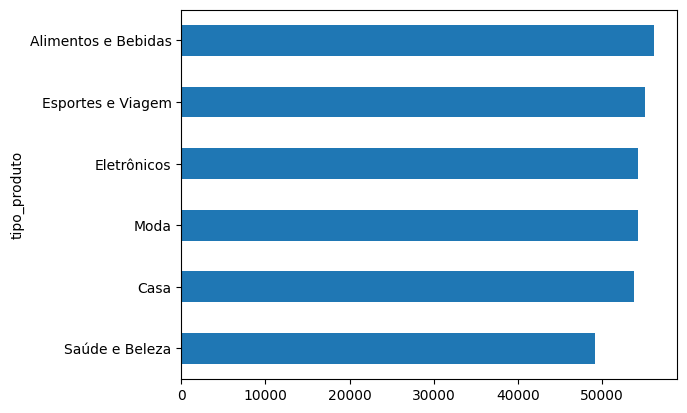

In [30]:
response = query_engine.query('Plote o valor total por tipo de produto, ordenado do menor para o maior e mantendo as barras na horizontal')

In [31]:
# Quando não fazemos uma pergunta, o modelo pode se perder e trazer uma resposta em inglês

formatar_texto(response)

Here is a synthesized response based on the query results:  "The plot shows the total value by type
of product, ordered from smallest to largest, with horizontal bars. The x-axis represents the total
value, and the y-axis lists the different types of products. The horizontal bars are arranged in
ascending order of their total values, allowing for easy comparison between products."


In [32]:
# Como podemos ver, ele mantém a resposta em inglês

response = query_engine.query('Qual é o método de pagamento mais utilizado em cada filial?')

print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
Based on the query results, here is a synthesized response:

O método de pagamento mais utilizado em cada filial é: 
- Na filial A, é a Carteira Digital.
- Na filial B, é a Carteira Digital.
- Na filial C, é o Dinheiro.


In [33]:
# Pedir para ele responder um português resolve o problema, porém não é muito prático fazer isso todas as vezes.

response = query_engine.query('Qual é o método de pagamento mais utilizado em cada filial? Responda em português BR')

print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
O método de pagamento mais utilizado em cada filial é:

* Na filial A, o método mais utilizado é a Carteira Digital.
* Na filial B, o método mais utilizado é a Carteira Digital.
* Na filial C, o método mais utilizado é o pagamento em Dinheiro.


# Construindo um pipeline

In [34]:
# Definindo as funções do pipeline

from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser

In [35]:
# Função para obter uma descrição das colunas do DataFrame
# Usamos '\n' para pular linhas

def descricao_colunas(df):
  descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
  return 'Aqui estão os detalhes das colunas do DataFrame:\n' + descricao

# Instruções para orientar o modelo a converter uma consulta em linguagem natural em código Python executável com a biblioteca Pandas
instruction_str = (
    "1. Converta a consulta para código Python executável usando Pandas.\n"
    "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
    "3. O código deve representar uma solução para a consulta.\n"
    "4. IMPRIMA APENAS A EXPRESSÃO.\n"
    "5. Não coloque a expressão entre aspas.\n")

# Prompt que será enviado ao modelo para que ela gere o código Pandas desejado
pandas_prompt_str = (
    "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
    "{colunas_detalhes}\n\n"
    "Este é o resultado de `print(df.head())`:\n"
    "{df_str}\n\n"
    "Siga estas instruções:\n"
    "{instruction_str}\n"
    "Consulta: {query_str}\n\n"
    "Expressão:"
)

# Prompt para guiar o modelo a sintetizar uma resposta com base nos resultados obtidos pela consulta Pandas
response_synthesis_prompt_str = (
   "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
   "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
   "Consulta: {query_str}\n\n"
   "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
   "Saída do Pandas: {pandas_output}\n\n"
   "Resposta:"
   "Ao final, exibir o código usado para gerar a resposta, no formato: O código utilizado foi {pandas_instructions}"
)

# Módulo para obter as instruções Pandas
pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str, colunas_detalhes=descricao_colunas(df), df_str=df.head(5)
)
# Módulo para executar as instruções Pandas
pandas_output_parser = PandasInstructionParser(df)

# Módulo para sintetizar a resposta
response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

# Modelo
llm = Groq(model='llama3-70b-8192', api_key=key)

In [36]:
from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)

In [37]:
# Definindo os módulos do pipeline

qp = QP(
    modules = {
        "input": InputComponent(),
        "pandas_prompt": pandas_prompt,
        "llm1": llm,
        "pandas_output_parser": pandas_output_parser,
        "response_synthesis_prompt": response_synthesis_prompt,
        "llm2": llm
    },
    verbose=True
)

# Definindo a cadeia

qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])

# Definindo os links

qp.add_links(
    [
        Link("input", "response_synthesis_prompt", dest_key="query_str"),

        Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),

        Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output")
    ]
)
qp.add_link("response_synthesis_prompt", "llm2")

In [38]:
# Testando o nosso pypeline

response = qp.run(query_str='Qual é a média gasta por cada tipo de cliente?')

> Running module input with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module pandas_prompt with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detalhes das colunas do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: df.groupby('tipo_cliente')['total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Qual é a média gasta por cada tipo de cliente?
pandas_instructions: assistant: df.groupby('tipo_cliente')['total'].mean()
pandas_output: tipo_cliente
Membro    327.791305
Normal    318.122856
Name: total, dtype: float64

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados d

In [39]:
# Exibindo a resposta

texto = response.message.content
texto_formatado = textwrap.fill(texto, width=100)
print(texto_formatado)

A média gasta por cada tipo de cliente é de R$ 327,79 para os clientes Membro e R$ 318,12 para os
clientes Normal.  O código utilizado foi df.groupby('tipo_cliente')['total'].mean()


In [40]:
response = qp.run(query_str='Por que clientes tipo membro tem maior média de gastos?')

> Running module input with input: 
query_str: Por que clientes tipo membro tem maior média de gastos?

> Running module pandas_prompt with input: 
query_str: Por que clientes tipo membro tem maior média de gastos?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detalhes das colunas do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Por que clientes tipo membro tem maior média de gastos?
pandas_instructions: assistant: df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()
pandas_output: 327.7913053892216

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.
Re

In [41]:
# Aqui podemos avaliar a capacidade de análise do modelo

texto = response.message.content
texto_formatado = textwrap.fill(texto, width=100)
print(texto_formatado)

Os clientes tipo membro têm uma média de gastos de R$ 327,79, o que é maior em comparação aos outros
tipos de clientes. Isso pode ser devido a various razões, como a lealdade e a confiança que esses
clientes têm na marca, o que os leva a realizar compras mais frequentes e de maior valor. Além
disso, os membros podem ter acesso a ofertas e descontos exclusivos, o que pode aumentar seu gasto
médio.  O código utilizado foi `df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()`


In [42]:
# Agora vamos usar a biblioteca gradio para criar o nosso frontend

!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00


In [43]:
# Pipeline de consulta
'''Função para obter uma descrição das colunas do DataFrame'''
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui estão os detalhes das colunas do dataframe:\n" + descricao

'''Definição de módulos da pipeline'''
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para código Python executável usando Pandas.\n"
        "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
        "3. O código deve representar uma solução para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESSÃO.\n"
        "5. Não coloque a expressão entre aspas.\n")

    pandas_prompt_str = (
        "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este é o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instruções:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Expressão:"
)

    response_synthesis_prompt_str = (
       "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
       "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
       "Consulta: {query_str}\n\n"
       "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
       "Saída do Pandas: {pandas_output}\n\n"
       "Resposta: \n\n"
       "Ao final, exibir o código usado em para gerar a resposta, no formato: O código utilizado foi `{pandas_instructions}`"
    )

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descricao_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    '''Criação do Query Pipeline'''
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

In [44]:
# Biblioteca para gerar pdfs

!pip install fpdf -q

  Preparing metadata (setup.py) ... done


In [45]:
# Aqui nós configuramos o nosso front

import gradio as gr
from fpdf import FPDF
from datetime import datetime

# Função para carregar os dados

def carregar_dados(caminho_arquivo, df_estado):
  if caminho_arquivo is None or caminho_arquivo == '':
    return 'Por favor, faça o upload de um arquivo CSV para analisar.', pd.DataFrame(), df_estado
  try:
    df = pd.read_csv(caminho_arquivo)
    return 'Arquivo carregado com sucesso!', df.head(), df
  except Exception as e:
    return f'Erro ao carregar arquivo: {str(e)}', pd.DataFrame(), df_estado

# Função para processar a pergunta

def processar_pergunta(pergunta, df_estado):
  if df_estado is not None and pergunta:
    qp = pipeline_consulta(df_estado)
    resposta = qp.run(query_str=pergunta)
    return resposta.message.content

  return ''

# Função para armazenar o histórico

def add_historico(pergunta, resposta, historico_estado):
  if pergunta and resposta:
    historico_estado.append((pergunta, resposta))
    gr.Info('Adicionado ao PDF!', duration=2)
    return historico_estado

# Função para gerar o pdf

def gerar_pdf(historico_estado):
  if not historico_estado:
    return 'Nenhum dado para adicionar so PDF.', None
  timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
  caminho_pdf = f'relatorio_perguntas_respostas_{timestamp}.pdf'
  pdf = FPDF()
  pdf.add_page()
  pdf.set_auto_page_break(auto=True, margin=15)

  for pergunta, resposta in historico_estado:
    pdf.set_font('Arial', 'B', 14)
    pdf.multi_cell(0, 8, txt=pergunta)
    pdf.ln(2)
    pdf.set_font('Arial', '', 12)
    pdf.multi_cell(0, 8, txt=resposta)
    pdf.ln(6)

  pdf.output(caminho_pdf)
  return caminho_pdf

# Função para limpar a pergunta e resposta

def limpar_pergunta_resposta():
  return '', ''

# Função para resetar a aplicação

def resetar_aplicacao():
  return None, 'A aplicação foi resetada. Por favor, faça upload de um novo arquivo CSV.', pd.DataFrame(), '', None, [], ''

# Criando os blocos da interface

with gr.Blocks(theme='Soft') as app:

  gr.Markdown("# Analisando os dados🔎🎲") # Título do app

  gr.Markdown("""
  Carregue um arquivo CSV e faça perguntas sobre os dados. A cada pergunta, você poderá
  visualizar a resposta e, se desejar, adicionar essa interação ao PDF final, basta clicar
  em "Adicionar ao histórico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
  Após definir as perguntas e respostas no histórico, clique em "Gerar PDF". Assim, será possível
  baixar um PDF com o registro completo das suas interações. Se você quiser analisar um novo dataset,
  basta clicar em "Quero analisar outro dataset" ao final da página.
  """) # Descrição

  input_arquivo = gr.File(file_count="single", type='filepath', label='Upload CSV') # Recebendo apenas um arquivo do usuário
  upload_status = gr.Textbox(label='Status do upload') # Status do upload do arquivo
  tabela_dados = gr.Dataframe() # Tabela de dados

  gr.Markdown("""
  Exemplos de perguntas:
  1. Qual é o número de registros no arquivo?
  2. Quais são os tipos de dados das colunas?
  3. Quais são as estatísticas descritivas das colunas numéricas?
  """) # Exemplos de perguntas

  input_pergunta = gr.Textbox(label='Digite sua pergunta sobre os dados') # Recebendo a pergunta
  botao_submeter = gr.Button('Enviar') # Botão de envio
  output_resposta = gr.Textbox(label='Resposta') # Resposta do modelo
  with gr.Row():
    botao_limpeza = gr.Button('Limpar pergunta e resposta') # Botão de limpeza
    botao_add_pdf = gr.Button('Adicionar ao histórico do PDF') # Botão para salvar no pdf
    botao_gerar_pdf = gr.Button('Gerar PDF') # Botão para gerar o pdf
  arquivo_pdf = gr.File(label='Download PDF') # Botão de download do relatório em pdf
  botao_resetar = gr.Button('Quero analisar outro dataset') # Botão de resetar a aplicação

  # Gerenciamento de estados

  df_estado = gr.State(value=None)
  historico_estado = gr.State(value=[])

  # Conectando funções aos componentes

  input_arquivo.change(fn=carregar_dados,
                       inputs=[input_arquivo, df_estado],
                       outputs=[upload_status, tabela_dados, df_estado])

  botao_submeter.click(fn=processar_pergunta,
                       inputs=[input_pergunta, df_estado],
                       outputs=[output_resposta])

  botao_limpeza.click(fn=limpar_pergunta_resposta,
                      inputs=[],
                      outputs=[input_pergunta, output_resposta])

  botao_add_pdf.click(fn=add_historico,
                      inputs=[input_pergunta, output_resposta, historico_estado],
                      outputs=[historico_estado])

  botao_gerar_pdf.click(fn=gerar_pdf,
                        inputs=[historico_estado],
                        outputs=[arquivo_pdf])

  botao_resetar.click(fn=resetar_aplicacao,
                      inputs=[],
                      outputs=[input_arquivo, upload_status, tabela_dados, output_resposta, arquivo_pdf, historico_estado, input_pergunta])

app.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://76f0a7690a2d0f450b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


> Running module input with input: 
query_str: Qual é o número de registros no arquivo?

> Running module pandas_prompt with input: 
query_str: Qual é o número de registros no arquivo?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detalhes das colunas do dataframe:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: len(df)

> Running module response_synthesis_prompt with input: 
query_str: Qual é o número de registros no arquivo?
pandas_instructions: assistant: len(df)
pandas_output: 1000

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.
Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante...

Keyboard interruption in main thread... closing server.
Killing tun

In [ ]:
# Aqui vamos gerar o mesmo código, porém já no formato para ser copiado para o hugging face

from llama_index.llms.groq import Groq
from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser
from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)
import gradio as gr
import pandas as pd
from fpdf import FPDF
from datetime import datetime
import os

# API KEY do GROQ
api_key = os.getenv("secret_key")

# Configuração do modelo
llm = Groq(model="llama3-70b-8192", api_key=api_key)

# Pipeline de consulta
'''Função para gerar a descrição das colunas do dataframe'''
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui estão os detalhes das colunas do dataframe:\n" + descricao

'''Definição de módulos da pipeline'''
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para código Python executável usando Pandas.\n"
        "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
        "3. O código deve representar uma solução para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESSÃO.\n"
        "5. Não coloque a expressão entre aspas.\n")

    pandas_prompt_str = (
        "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este é o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instruções:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Expressão:"
)

    response_synthesis_prompt_str = (
       "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
       "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
       "Consulta: {query_str}\n\n"
       "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
       "Saída do Pandas: {pandas_output}\n\n"
       "Resposta: \n\n"
       "Ao final, exibir o código usado em para gerar a resposta, no formato: O código utilizado foi `{pandas_instructions}`"
    )

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descricao_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    '''Criação do Query Pipeline'''
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", pd.DataFrame(), df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df.head(), df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", pd.DataFrame(), df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Função para adicionar a pergunta e a resposta ao histórico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        gr.Info("Adicionado ao PDF!", duration=2)
        return historico_estado

# Função para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", "B", 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", "", 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

# Função para limpar a pergunta e a resposta
def limpar_pergunta_resposta():
    return "", ""

# Função para resetar a aplicação
def resetar_aplicacao():
    return None, "A aplicação foi resetada. Por favor, faça upload de um novo arquivo CSV.", pd.DataFrame(), "", None, [], ""

# Criação da interface gradio
with gr.Blocks(theme="Soft") as app:

    # Título da app
    gr.Markdown("# Analisando os dados🔎🎲")

    # Descrição
    gr.Markdown("""
    Carregue um arquivo CSV e faça perguntas sobre os dados. A cada pergunta, você poderá
    visualizar a resposta e, se desejar, adicionar essa interação ao PDF final, basta clicar
    em "Adicionar ao histórico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
    Após definir as perguntas e respostas no histórico, clique em "Gerar PDF". Assim, será possível
    baixar um PDF com o registro completo das suas interações. Se você quiser analisar um novo dataset,
    basta clicar em "Quero analisar outro dataset" ao final da página.
    """)

    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Tabela de dados
    tabela_dados = gr.DataFrame()

    # Exemplos de perguntas
    gr.Markdown("""
    Exemplos de perguntas:
    1. Qual é o número de registros no arquivo?
    2. Quais são os tipos de dados das colunas?
    3. Quais são as estatísticas descritivas das colunas numéricas?
    """)

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Botões para limpar a pergunta e a resposta, adicionar ao historico e gerar o PDF
    with gr.Row():
        botao_limpeza = gr.Button("Limpar pergunta e resultado")
        botao_add_pdf = gr.Button("Adicionar ao histórico do PDF")
        botao_gerar_pdf = gr.Button("Gerar PDF")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Botão para resetar a aplicação
    botao_resetar = gr.Button("Quero analisar outro dataset!")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)
    historico_estado = gr.State(value=[])

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados, inputs=[input_arquivo, df_estado], outputs=[upload_status, tabela_dados, df_estado])
    botao_submeter.click(fn=processar_pergunta, inputs=[input_pergunta, df_estado], outputs=output_resposta)
    botao_limpeza.click(fn=limpar_pergunta_resposta, inputs=[], outputs=[input_pergunta, output_resposta])
    botao_add_pdf.click(fn=add_historico, inputs=[input_pergunta, output_resposta, historico_estado], outputs=historico_estado)
    botao_gerar_pdf.click(fn=gerar_pdf, inputs=[historico_estado], outputs=arquivo_pdf)
    botao_resetar.click(fn=resetar_aplicacao, inputs=[], outputs=[input_arquivo, upload_status, tabela_dados, output_resposta, arquivo_pdf, historico_estado, input_pergunta])

if __name__ == "__main__":
    app.launch()

In [ ]:
# Conteúdo do arquivo requirements.txt
'''
pandas==2.2.2
gradio==5.4.0
llama-index==0.11.20
llama-index-llms-groq==0.2.0
llama-index-experimental==0.4.0
fpdf==1.7.2
'''